# Build and train a simple GAN

The objective of this notebook is to develop some intuition on the functionning of GANs by working on a simple example.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

/home/alexander/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alexander/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alexander/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alexander/.local/lib/python3.6/site-packages/tensorflow/python/framework/dty

## Make data

We generate some random data.

In [2]:
def sample_data(n):
    x = np.random.uniform(-1.,1.,(n,))
    y = x*x
    data = np.vstack([x,y]).T
    return data

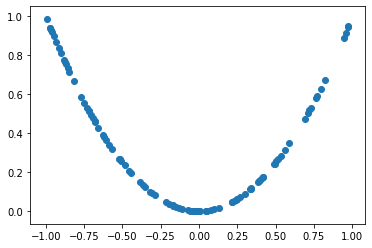

In [3]:
data = sample_data(100)
#data.shape
plt.scatter(data[:,0], data[:,1])

## Generator and discriminator

We buid two NNs: one for the generator and one for the discriminator.

In [4]:
from tensorflow.layers import dense

## function to sample noise
def sample_Z(m, n):
    out = np.random.uniform(-1., 1., size=[m, n])
    return out

def generator(Z, hsize=[20]*2, activation="relu"):
    ## TODO: build a generator whose parameters are in a specific scope: "GAN/Generator"
    with tf.variable_scope("GAN/Generator", reuse=False):
        h1 = dense(Z, hsize[0], activation=activation)
        h2 = dense(h1, hsize[1], activation=activation)
        out = dense(h2, 2)
    return out

def discriminator(X, hsize=[20]*2, reuse=False, activation="relu"):
    ## TODO: build a generator whose parameters are in a specific scope: "GAN/Discriminator"
    ## N.B.: we will reuse the same layers
    with tf.variable_scope("GAN/Discriminator", reuse=reuse):
        h1 = dense(X, hsize[0], activation=activation)
        h2 = dense(h1, hsize[1], activation=activation)
        out = dense(h2, 1)
    return out

## Loss

In [5]:
X = tf.placeholder(tf.float32,[None,2], name="X")
Z = tf.placeholder(tf.float32,[None,2], name="Z")

## generate fake sample
G_sample = generator(Z) ## TODO

## evaluate true and fake sample
r_logits = discriminator(X) ## TODO
f_logits = discriminator(G_sample, reuse=True) ## TODO

## losses
loss_fun = tf.nn.sigmoid_cross_entropy_with_logits

## discriminator loss
loss_dis = tf.reduce_mean(loss_fun(logits=r_logits, labels=tf.ones_like(r_logits))) + tf.reduce_mean(loss_fun(logits=f_logits, labels=tf.zeros_like(f_logits))) ## TODO: fake sample

## generator loss
loss_gen = tf.reduce_mean(loss_fun(logits=f_logits, labels=tf.ones_like(f_logits))) ## TODO

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Optimizer

In [6]:
## one step train generator
vars_gen = tf.get_collection(tf.GraphKeys)
step_gen = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_gen, var_list = vars_gen)

## one step train discriminator
vars_dis = ## TODO
step_dis = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss_dis, var_list = vars_dis)

SyntaxError: invalid syntax (<ipython-input-6-7653bcc39a7e>, line 6)

## Training

In [ ]:
## initialize the sessions and the variables
sess = tf.Session()
tf.global_variables_initializer().run(session=sess)

batch_size = 100
n_steps = int(5e4)
nd_steps = 1 ## number of steps we train the discriminator
ng_steps = 1 ## number of steps we train the generator

x_plot = sample_data(n=batch_size)
losses = []

for i in range(int(n_steps/(nd_steps + ng_steps))):
    
    X_batch = sample_data(n=batch_size)
    Z_batch = sample_Z(batch_size, 2)
    dict_batch = {X: X_batch, Z: Z_batch}
    
    ## TODO: train discriminator
    for _ in range(nd_steps)
    
    ## TODO: train generator
    
    i_step = i*(nd_steps + ng_steps)
    ## save current losses
    if i%10 == 0:
        losses.append([i, i_step, dloss, gloss])
        
    ## display current losses
    if i_step%1000 == 0:
        print("iter: {} | step: {} | dis loss: {:0.4f} | gen loss: {:0.4f}".format(i, i_step, dloss, gloss))
    
    ## diplay a true sample and a generated sample
    if i_step%1000 == 0:
        plt.figure()
        g_plot = sess.run(G_sample, feed_dict=dict_batch)
        xax = plt.scatter(x_plot[:,0], x_plot[:,1])
        gax = plt.scatter(g_plot[:,0],g_plot[:,1])
        plt.legend((xax, gax), ("Real Data","Generated Data"))
        plt.title('Samples at Iteration %d'%i)
        plt.show()

# Plot 

In [ ]:
losses = pd.DataFrame(losses, columns=['Iteration', 'Step', 'loss discriminator', 'loss generator'])

plt.plot('Step', 'loss discriminator', data=losses)
plt.plot('Step', 'loss generator', data=losses)
plt.xlabel('Step')
plt.legend()
plt.title('Training Losses')
plt.ylim(0,5)
plt.show()